In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文标签
plt.rcParams['axes.unicode_minus'] = False

In [2]:
def lis(data):  #筛选符合要求的列数据，即原始数据raw
    import re
    lis = list(data)
    lisdata = []
    listdata = []
    for i in range(len(lis)):
        lisdata.append(re.findall('.*raw$', lis[i]))  #匹配以raw结尾的字符串
        if len(lisdata[i]) != 0:
            listdata.append(lisdata[i])

    list_data = []
    for i in range(len(listdata)):
        list_data.append(listdata[i][0])

    return list_data

In [12]:
def skew(data):  #计算特征列的偏态系数以及偏斜程度
    mean = Data.mean(axis=0)  #均值
    median = Data.median(axis=0)  #中位数
    std = Data.std(axis=0)  #标准差
    SK = (mean - median) / std  #偏度系数，SK的绝对值越小，偏斜程度越小
    sk = pd.DataFrame(SK).rename(columns={0: 'SK'})
    sk['feature'] = sk.index
    sk = pd.DataFrame(sk).rename(index=dict(
        zip(list(sk.index), list(range(len(sk.index))))),
                                 columns={0: 'SK'})
    sk['status'] = [
        '左偏态' if sk['SK'][i] < 0 else '右偏态' for i in range(len(sk['SK']))
    ]
    a = []
    for i in range(len(sk['SK'])):
        if abs(sk['SK'][i]) > 1:
            a.append('高度偏态')
        elif abs(sk['SK'][i]) < 0.5:
            a.append('轻度偏态')
        else:
            a.append('中度偏态')
    sk['degree'] = a
    skew = sk[['feature', 'SK', 'status', 'degree']]
    return skew

In [13]:
data = pd.read_csv("Z:\\Data\\xu_data\\2020-10-01.csv")
Data = data.loc[:, lis(data)]
skew_data = skew(Data)
skew_data

,feature,SK,status,degree
0,smart_1_raw,0.260895,右偏态,轻度偏态
1,smart_3_raw,0.387164,右偏态,轻度偏态
2,smart_4_raw,0.030847,右偏态,轻度偏态
3,smart_5_raw,0.039116,右偏态,轻度偏态
4,smart_7_raw,0.019650,右偏态,轻度偏态
5,smart_9_raw,-0.003088,左偏态,轻度偏态
6,smart_10_raw,0.021868,右偏态,轻度偏态
7,smart_12_raw,0.207163,右偏态,轻度偏态
8,smart_184_raw,0.004679,右偏态,轻度偏态
9,smart_187_raw,0.007828,右偏态,轻度偏态


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


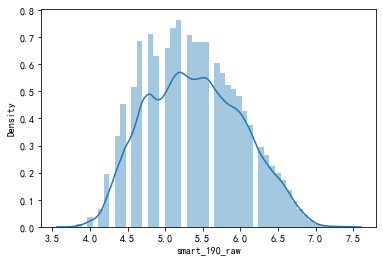

In [31]:
#绘制直方图
sns.distplot(np.sqrt(data['smart_190_raw']))

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


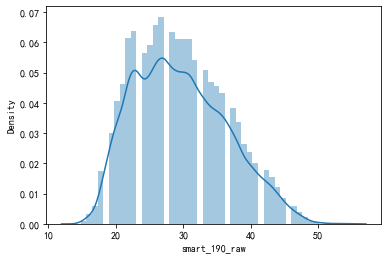

In [28]:
sns.distplot(data['smart_190_raw'])

In [27]:
Data.skew()#计算偏度

smart_1_raw        0.514052
smart_3_raw        2.421132
smart_4_raw      135.453767
smart_5_raw       39.908957
smart_7_raw      212.435425
smart_9_raw        0.207927
smart_10_raw      52.732847
smart_12_raw      39.258113
smart_184_raw    213.710084
smart_187_raw    208.748244
smart_188_raw     53.918639
smart_189_raw    121.436712
smart_190_raw      0.386310
smart_191_raw     71.463058
smart_192_raw     11.990122
smart_193_raw      6.624487
smart_194_raw      0.360176
smart_195_raw     -0.003489
smart_197_raw    381.416400
smart_198_raw    388.556681
smart_199_raw    161.811682
smart_240_raw      0.226259
smart_241_raw     -0.841840
smart_242_raw     97.740733
dtype: float64